# Interspeech


In [1]:
import matplotlib.pyplot

In [2]:
import numpy as np

import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from sklearn.model_selection import train_test_split
import random

import keras
from keras import backend as K
from keras import layers

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import tensorflow as tf

/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
global X, T
X=[]
T=[]

In [4]:
def loaddata(filename,num):
    f=sio.loadmat(filename)
    data=f['cep']
    data=np.asarray(data)
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    data=(data-mean)/std
    data=np.asarray(np.vsplit(data[0:int(data.shape[0]/data.shape[1])*data.shape[1]],int(data.shape[0]/data.shape[1])))
    for i in range (data.shape[0]):
        X.append(data[i])
        T.append(num)
    return X, T

In [5]:
X,T = loaddata('punjabi.mat',0)

In [6]:
len(X), len(T)

(5623, 5623)

In [7]:
X,T = loaddata('malayalam.mat',1)

In [8]:
len(X), len(T)

(11898, 11898)

In [9]:
X,T = loaddata('bengali.mat',2)

In [10]:
len(X),len(T)

(18251, 18251)

## Split Dataset

In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(np.array(X),np.array(T), train_size=0.8, random_state=30)
np.array(Xtrain).shape, np.array(Xtest).shape

/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((14600, 39, 39), (3651, 39, 39))

## Convert 2D dataset to a 1D vector

In [12]:
batchSize=10
numClasses=3
epochs=20
imageRows, imageCols =39,39

In [13]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], imageRows, imageCols, 1)
Xtest = Xtest.reshape(Xtest.shape[0], imageRows,imageCols, 1)
inputShape = (imageRows,imageCols,1)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [14]:
Ytrain = keras.utils.to_categorical(Ytrain, numClasses)
Ytest = keras.utils.to_categorical(Ytest, numClasses)

## Define CNN Model

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=inputShape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(numClasses, activation='softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 37, 37, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2367616   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

## Model Train

In [17]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [18]:
speechTrainData=model.fit(Xtrain, Ytrain,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(Xtest, Ytest))

Train on 14600 samples, validate on 3651 samples
Epoch 1/20
14600/14600 [==============================] - 464s 32ms/step - loss: 1.1231 - acc: 0.3432 - val_loss: 1.0962 - val_acc: 0.3503
Epoch 2/20
14600/14600 [==============================] - 458s 31ms/step - loss: 1.0976 - acc: 0.3451 - val_loss: 1.0964 - val_acc: 0.3503
Epoch 3/20
14600/14600 [==============================] - 450s 31ms/step - loss: 1.0977 - acc: 0.3432 - val_loss: 1.0958 - val_acc: 0.3503
Epoch 4/20
14600/14600 [==============================] - 447s 31ms/step - loss: 1.0977 - acc: 0.3405 - val_loss: 1.0956 - val_acc: 0.3550
Epoch 5/20
14600/14600 [==============================] - 474s 32ms/step - loss: 1.0976 - acc: 0.3480 - val_loss: 1.0962 - val_acc: 0.3503
Epoch 6/20
14600/14600 [==============================] - 259s 18ms/step - loss: 1.0976 - acc: 0.3445 - val_loss: 1.0954 - val_acc: 0.3550
Epoch 7/20
14600/14600 [==============================] - 264s 18ms/step - loss: 1.0977 - acc: 0.3440 - val_loss: 1.0

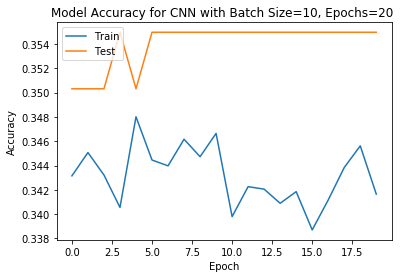

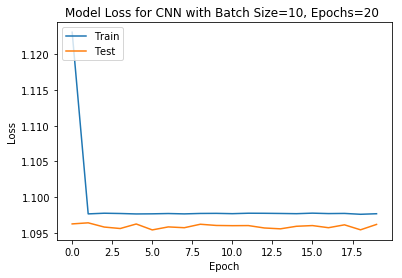

In [19]:
plt.plot(speechTrainData.history['acc'])
plt.plot(speechTrainData.history['val_acc'])
plt.title('Model Accuracy for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot Model  Loss
plt.plot(speechTrainData.history['loss'])
plt.plot(speechTrainData.history['val_loss'])
plt.title('Model Loss for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()